<h1>Meeting 4: Linear Regression<h1>

---


***Untuk menyelesaikan permasalahan Supervised Machine Learning***

# Regression
Regresi dan Klasifikasi dikategorikan di bawah payung yang sama dari supervised machine learning. Keduanya memiliki konsep yang sama dalam memanfaatkan kumpulan data training untuk membuat prediksi.<br>
Perbedaan utama di antara Regresi dan Klasifikasi adalah bahwa variabel target dalam regresi adalah kontinu sedangkan untuk klasifikasi bersifat kategorikal.

### Import library yang diperlukan

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
from sklearn.linear_model import LinearRegression

## Simple Liner Regression

### Load Dataset

In [2]:
sales_call = [20, 40, 20, 30, 10, 10, 20, 20, 20, 30]
copier_sold = [30, 60, 40, 60, 30, 40, 40, 50, 30, 70]

df = pd.DataFrame({"Sales Call": sales_call, "Copier Sold": copier_sold})

### Membuat model persamaan regresi dengan Scipy

In [3]:
result = st.linregress(sales_call, copier_sold)

print("Koefisien Korelasi: {:0.4f}".format(result.rvalue)) 
print("Koefisien Determinasi: {:0.4f}".format(np.power(result.rvalue, 2)))

print("Model persamaan regresi nya: y = {0:0.4f} X + {1:0.4f}".format(result.slope, result.intercept))

Koefisien Korelasi: 0.7590
Koefisien Determinasi: 0.5761
Model persamaan regresi nya: y = 1.1842 X + 18.9474


### Menampilkan garis regresi

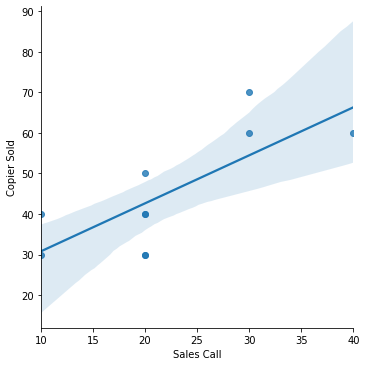

In [4]:
sns.lmplot(x="Sales Call", y="Copier Sold", data=df)
plt.show()

### Prediksi Copier Sold
Jika seorang sales melakukan 20 calls

In [5]:
X = 20
y_pred = result.slope * X + result.intercept

print("Jika seorang sales melakukan 20 calls, jumlah Copier Sold diprediksi: {:0.4f}".format(y_pred))

Jika seorang sales melakukan 20 calls, jumlah Copier Sold diprediksi: 42.6316


## Exercise 1: Simple Linear Regression
Pada sebuah perusahaan terdapat data antara Years of Experience sebagai Independent Variable dan Salary sebagai Dependent Variable.<br>
Model regresi linier sederhana: y=β0​+β1​x+ε<br>
`url = "https://raw.githubusercontent.com/twiradinata/datasets/main/salary_data.csv"`<br>
Tentukan model persamaan regresi linier nya.

In [6]:
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/salary_data.csv"
df = pd.read_csv(url)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
result = st.linregress(df['YearsExperience'], df['Salary'])

print("Koefisien Korelasi: {:0.4f}".format(result.rvalue)) 
print("Koefisien Determinasi: {:0.4f}".format(np.power(result.rvalue, 2)))

print("Model persamaan regresi nya: y = {0:0.4f} X + {1:0.4f}".format(result.slope, result.intercept))

Koefisien Korelasi: 0.9782
Koefisien Determinasi: 0.9570
Model persamaan regresi nya: y = 9449.9623 X + 25792.2002


In [8]:
X = 1.4
y_pred = result.slope * X + result.intercept

print("Karyawan dengan pengalaman 1.4thn, salary nya: {:0.4f}".format(y_pred))

Karyawan dengan pengalaman 1.4thn, salary nya: 39022.1474


## Multiple Linear Regression Analysis (Heating Cost)

### Load Dataset

In [9]:
temperature = [35,29,36,60,65,30,10,7,21,55,54,48,20,39,60,20,58,40,27,30]
insulation = [3,4,7,6,5,5,6,10,9,2,12,5,5,4,8,5,7,8,9,7]
age_of_furnace = [6,10,3,9,6,5,7,10,11,5,4,1,15,7,6,8,3,11,8,5]
heating_cost = [250,360,165,43,92,200,355,290,230,120,73,205,400,320,72,272,94,190,235,139]

df = pd.DataFrame({"temperature": temperature, "insulation": insulation, 
                   "age of furnace": age_of_furnace, "heating cost": heating_cost})
df.head()

,temperature,insulation,age of furnace,heating cost
0,35,3,6,250
1,29,4,10,360
2,36,7,3,165
3,60,6,9,43
4,65,5,6,92


### Exploratory Data Analysis (Univariate)

In [10]:
df.describe()

,temperature,insulation,age of furnace,heating cost
count,20.000000,20.000000,20.000000,20.000000
mean,37.200000,6.350000,7.000000,205.250000
std,17.410221,2.476734,3.340344,105.858831
min,7.000000,2.000000,1.000000,43.000000
25%,25.500000,5.000000,5.000000,113.500000
50%,35.500000,6.000000,6.500000,202.500000
75%,54.250000,8.000000,9.250000,276.500000
max,65.000000,12.000000,15.000000,400.000000


### Exploratory Data Analysis (Multivariate)

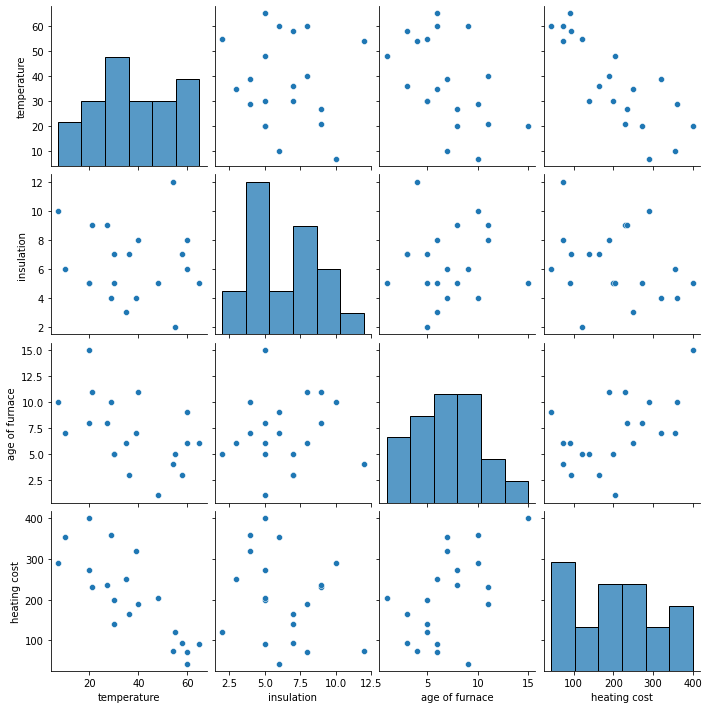

In [11]:
sns.pairplot(data=df)
plt.show()

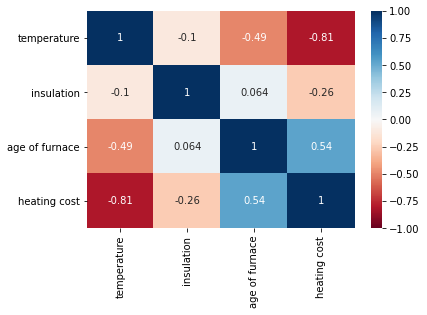

In [12]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

### Tentukan variabel independent dan dependent nya

In [13]:
X = df[["temperature", "insulation", "age of furnace"]]
y = df["heating cost"]

### Membuat model persamaan Regresi dari seluruh data

In [14]:
result = LinearRegression()
result.fit(X, y)

print("Intercept: {:0.4f}".format(result.intercept_))
print("Coefficient b1: {:0.4f}".format(result.coef_[0]))
print("Coefficient b2: {:0.4f}".format(result.coef_[1]))
print("Coefficient b3: {:0.4f}".format(result.coef_[2]))

Intercept: 427.1938
Coefficient b1: -4.5827
Coefficient b2: -14.8309
Coefficient b3: 6.1010


### Prediksi Heating Cost
Jika Outside Temp = 30, Attic Insulation = 5, Age of Furnace = 10

In [15]:
result.predict([[30, 5, 10]])

array([276.56993172])

### Model Summary

In [16]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           heating cost   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     21.90
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           6.56e-06
Time:                        01:41:12   Log-Likelihood:                -104.80
No. Observations:                  20   AIC:                             217.6
Df Residuals:                      16   BIC:                             221.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            427.1938     59.601      7.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Multiple Linear Regression Analysis (Advertising Cost)

### Import Library yang diperlukan

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset
Dataset yang digunakan memiliki informasi biaya beriklan di TV, Radio, dan Surat Kabar beserta dengan catatan Sales yang dihasilkan pada periode tertentu.

In [18]:
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/advertising.csv"
dataset = pd.read_csv(url)
dataset = dataset[['TV', 'Radio', 'Newspaper', 'Sales']]

### Exploratory Data Analysis (Univariate)

In [19]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


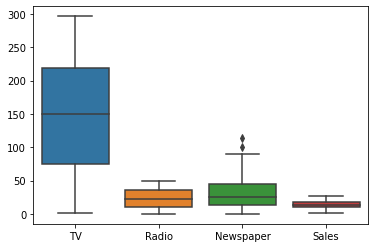

In [20]:
sns.boxplot(data=dataset)

### Exploratory Data Analysis (Multivariate)

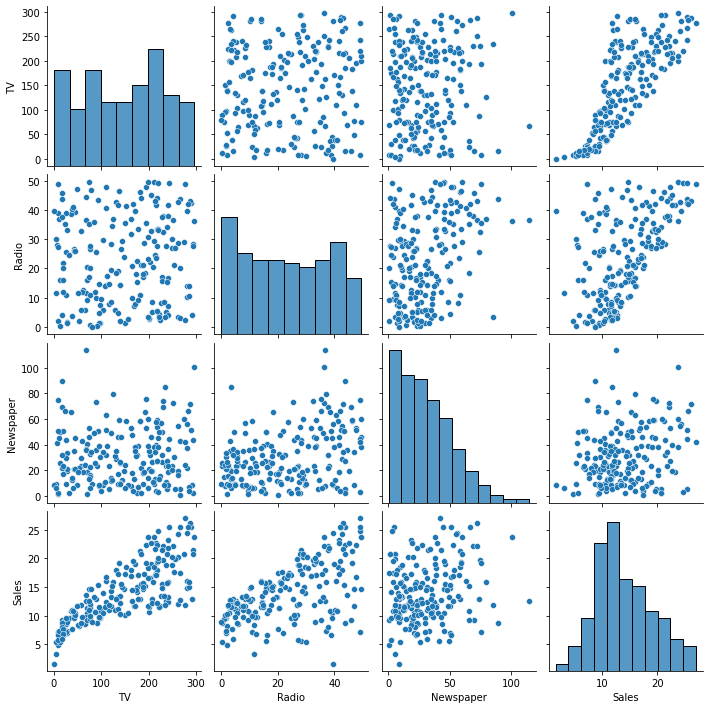

In [21]:
sns.pairplot(dataset)
plt.show()

### Tentukan variabel independent dan dependent nya

In [22]:
# Asumsi X adalah features yang diletakkan di kolom kiri mulai index 1, kecuali paling kanan
X = dataset.iloc[:,:-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:,-1].values

### Split dataset menjadi data Training dan data Test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Membuat model persamaan Regresi berdasarkan data Training

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Uji coba model persamaan berdasarkan data anonymous

In [25]:
# Prediksikan apabila biaya beriklan di TV 150, Radio 41, Newspaper 58, berapa Sales yang dihasilkan?
np.set_printoptions(precision=4)
print(regressor.predict([[150, 41, 58]]))

[17.7435]


### Model Summary

In [26]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     475.9
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           3.89e-75
Time:                        01:41:19   Log-Likelihood:                -279.71
No. Observations:                 150   AIC:                             567.4
Df Residuals:                     146   BIC:                             579.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8926      0.346      8.362      0.0

### Uji hasil prediksi dengan data Test

In [27]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), 
                        columns=["Prediction", "Test"])
evaluate.head()

,Prediction,Test
0,10.049457,11.3
1,7.430523,8.4
2,6.971521,8.7
3,24.163787,25.4
4,12.002156,11.7


### Evaluating Goodness of Fit using RMSE

In [28]:
from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE):  2.0031219440955406


In [29]:
pip install --upgrade scikit-learn

In [30]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_test, y_pred))

0.2216611243694418


# Assignment
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.<br>
Please predict the weight of a fish with Length1 = 30, Length2 = 29, Length3 = 34, Height = 13, and Width = 5.
<p>Dataset is available at: https://raw.githubusercontent.com/twiradinata/datasets/main/fish-weight.csv

In [94]:
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/fish-weight.csv"
df = pd.read_csv(url)
df.sample(n = 10)

,Species,Weight,Length1,Length2,Length3,Height,Width
66,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944
94,Perch,150.0,21.0,23.0,24.5,5.2185,3.6260
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
49,Roach,161.0,22.0,23.4,26.7,6.9153,3.6312
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240
68,Parkki,145.0,19.8,21.5,24.1,9.7364,3.1571
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792
34,Bream,950.0,38.0,41.0,46.5,17.6235,6.3705
11,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440


In [96]:
# Apabila ada data yang bernilai zero diubah ke NaN
df = df.replace(0, np.nan)

# Apabila ada data NaN didrop
df = df.dropna()

In [95]:
# Untuk melihat type dan jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [63]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [99]:
# Melihat ada berapa banyak jumlah ikan berdasarkan species nya
df.groupby('Species')['Species'].count()

Species
Bream        35
Parkki       11
Perch        56
Pike         17
Roach        19
Smelt        14
Whitefish     6
Name: Species, dtype: int64

In [103]:
# Melihat central tendency dari kolom Weight berdasarkan species
df.groupby('Species')['Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Bream,35.0,617.828571,209.205709,242.0,462.50,610.00,717.0,1000.0
Parkki,11.0,154.818182,78.755086,55.0,105.00,145.00,185.0,300.0
Perch,56.0,382.239286,347.617717,5.9,120.00,207.50,692.5,1100.0
Pike,17.0,718.705882,494.140765,200.0,345.00,510.00,950.0,1650.0
Roach,19.0,160.052632,83.528088,40.0,115.00,150.00,174.5,390.0
Smelt,14.0,11.178571,4.131526,6.7,8.95,9.85,12.2,19.9
Whitefish,6.0,531.000000,309.602972,270.0,279.00,423.00,735.0,1000.0


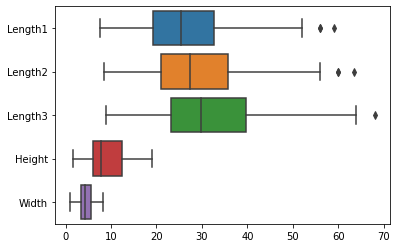

In [88]:
# Menampilkan boxplot secara horisontal untuk melihat sebaran data dan outliers
sns.boxplot(data=df[["Length1",	"Length2", "Length3",	"Height",	"Width"]], orient='h')
plt.show()

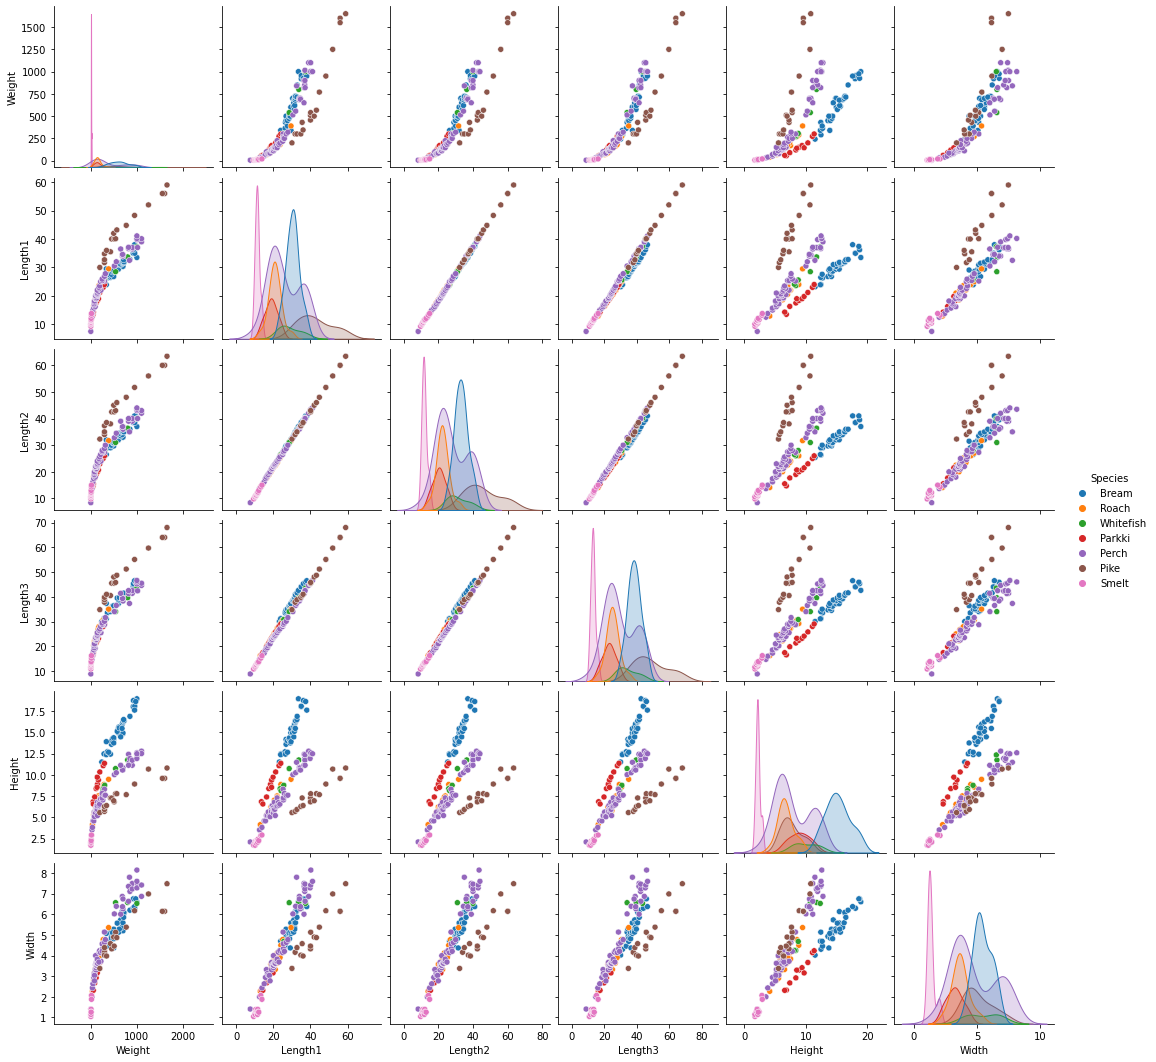

In [65]:
# Melihat hubungan antar variabel, dibedakan warna nya berdasarkan jenis species
sns.pairplot(data=df, hue='Species')
plt.show()

In [75]:
# Memilih variabel prediktor (X)
X = df[["Length1",	"Length2", "Length3",	"Height",	"Width"]]

# Memilih variabel target (y)
y = df["Weight"]

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Intercept: {:0.4f}".format(regressor.intercept_))
print("Coefficient b1: {:0.4f}".format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))
print("Coefficient b4: {:0.4f}".format(regressor.coef_[3]))
print("Coefficient b5: {:0.4f}".format(regressor.coef_[4]))

Intercept: -448.7788
Coefficient b1: 65.3402
Coefficient b2: -28.3346
Coefficient b3: -16.4273
Coefficient b4: 22.5800
Coefficient b5: 55.2818


In [87]:
# Koefisien determinasi (r2) merupakan ukuran proporsi variasi variabel target 
# yang mampu dijelaskan oleh variabel prediktornya.
print("Nilai koefisien determinasi r2 adalah: {:0.4f}".format(regressor.score(X_train, y_train)))

Nilai koefisien determinasi r2 adalah: 0.8914


In [78]:
# Fish with Length1 = 30, Length2 = 29, Length3 = 34, Height = 13, and Width = 5.
print(regressor.predict([[30, 29, 34, 13, 5]]))

[701.1426]


In [79]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     183.8
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           2.83e-52
Time:                        03:10:50   Log-Likelihood:                -723.20
No. Observations:                 118   AIC:                             1458.
Df Residuals:                     112   BIC:                             1475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -448.7788     30.629    -14.652      0.0

In [80]:
y_pred = regressor.predict(X_test)

In [81]:
# Membuat data frame berisi data actual vs. hasil prediksi
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
7,390.0,474.975479
45,160.0,207.561950
114,700.0,700.812734
121,1015.0,830.998021
64,120.0,157.228285


Terdapat beberapa metode evaluasi untuk model regresi yang umum digunakan, yaitu RMSE, MAE, dan MAPE. https://towardsdatascience.com/forecast-kpi-rmse-mae-mape-bias-cdc5703d242d 

In [82]:
from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE):  158.54394308252213


Apabila terjadi error pada waktu mengakses class mean_absolute_percentage_error Silakan update package sklearn terlebih dahulu dengan perintah: `pip install --upgrade scikit-learn` <br>

Nilai MAPE dapat lebih dari 100% yang menunjukkan tingkat error yang besar: https://stats.stackexchange.com/questions/341605/mape-value-more-than-100

In [83]:
from sklearn.metrics import mean_absolute_percentage_error

print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

MAPE:  1.006390904522684


<h1 align="center">=== Selamat Bekerja ===</h1>